# Quantum Algorithms

### Superdense Coding

Superdense coding is the transmittion of 2 classical bits using 1 qubit

Has to be 10, 01, 11, 00 01
Who is sending the message Shrek
Who is recieving the message Fiona

Shrek sent 01
Fiona recieved 01


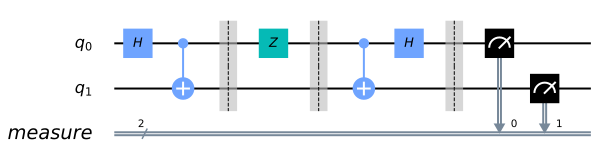

In [1]:
#Import packages
import qiskit as q
import qiskit as q
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit import IBMQ
%config InlineBackend.figure_format = 'svg'

#Making the circuit
cir=q.QuantumCircuit(2)

cir.h(0)
cir.cx(0,1)
cir.barrier()

m = input('Has to be 10, 01, 11, 00 ')
sender = input('Who is sending the message ')
sendee = input('Who is recieving the message ')

if m=="10":
    cir.x(0)
elif m=="01":
    cir.z(0)
elif m=="11":
    cir.z(0)
    cir.x(0)
elif m=="00":
    pass

cir.barrier()
cir.cx(0,1)
cir.h(0)
cir.measure_all()

backend = Aer.get_backend('qasm_simulator')
job_sim = execute(cir, backend, shots=1)
sim_result = job_sim.result()
result = sim_result.get_counts(cir)

for i in result:
    result = i

print('\n{} sent {}'.format(sender,m))
print('{} recieved {}'.format(sendee,result))

#Print the circuit
simulator = Aer.get_backend('qasm_simulator')
cir.draw(output='mpl')

## Quantum Teleportation

Quantum Teleportation is transporting a qubit with 2 classical bits

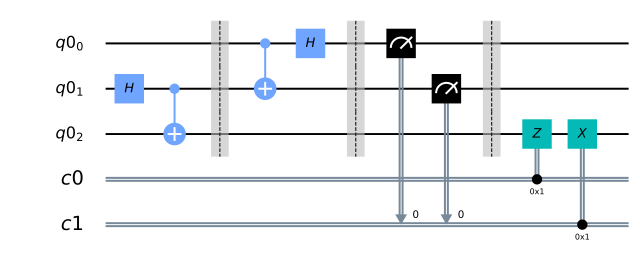

In [2]:
import numpy as np
qr = q.QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
tele_cir = QuantumCircuit(qr, crz, crx)

#Bell State
tele_cir.h(1)
tele_cir.cx(1,2)

tele_cir.barrier()
tele_cir.cx(0,1)

tele_cir.h(0)
tele_cir.barrier()
tele_cir.measure(0,1)
tele_cir.measure(1,1)

tele_cir.barrier()
tele_cir.z(2).c_if(crz, 1)
tele_cir.x(2).c_if(crx, 1)

tele_cir.draw(output='mpl')

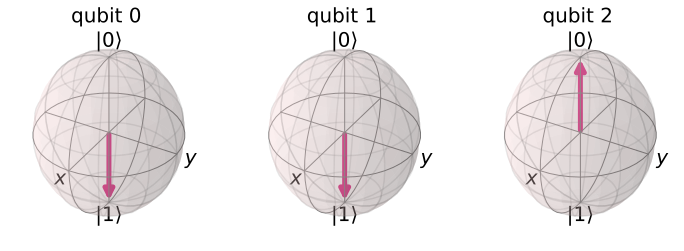

In [3]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector
backend = Aer.get_backend('statevector_simulator')
out_vector = execute(tele_cir, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

In the Bell Inequality Test 2 players are separated and can't communicate during the game. A ref sends one bit (x) to one player and another (y) to the other player. Both players send a bit back (a(x), b(y)) depending on the value of the bit. Then, the ref sits down and decides whether they win or not. The ref decides using a(x) ⊕ b(y) = xy (⊕ is XOR or mod2). The player's goal is to win as many rounds as possible. This algorithm should make them correct 85% of the time.

In [5]:
import numpy as np

import cirq

def main():
    circ = bell_test_circ()
    reps = 200    #Amount of games they're playing
    
    player1 = input("Who is your first player ")
    player2 = input("Who is your second player ")
    print('Simulating {} games'.format(reps))
    result = cirq.Simulator().run(program=circ, repetitions=reps)
    
    a = np.array(result.measurements['a'][:, 0])
    b = np.array(result.measurements['b'][:, 0])
    x = np.array(result.measurements['x'][:, 0])
    y = np.array(result.measurements['y'][:, 0])
    outcomes = a ^ b == x & y
    wins = len([e for e in outcomes if e]) * 100/reps
    
    print('Results:')
    print("{}'s bits: {}".format(player1,bitstring(a)))
    print("{}'s bits:".format(player2,bitstring(b)))
    print("Judge1's bits:", bitstring(x))
    print("Judge2's bits:", bitstring(y))
    print("{} and {}'s wins': {}".format(player1, player2, wins))
    print('\nCircuit:\n')
    print(circ)

#bell state circ
def bell_test_circ():
    #Qubits for Alice and bob
    alice = cirq.GridQubit(0,0)
    bob = cirq.GridQubit(1,0)
    aliceRef = cirq.GridQubit(0,1)
    bobRef = cirq.GridQubit(1,1)
    
    circ = cirq.Circuit()
    
    #make bob and alice's entanged qubit
    circ.append([
        cirq.H(alice),
        cirq.CNOT(alice, bob),
        cirq.X(alice)**-0.25,
    ])
    
    #refs flip coins
    circ.append([
        cirq.H(aliceRef),
        cirq.H(bobRef),
    ])
    
    #Players do sqrt(x) on their refs coin
    circ.append([
        cirq.CNOT(aliceRef, alice)**0.5,
        cirq.CNOT(bobRef, bob)**0.5,
    ])
    
    #Results are recorded
    circ.append([
        cirq.measure(alice, key='a'),
        cirq.measure(bob, key='b'),
        cirq.measure(aliceRef, key='x'),
        cirq.measure(bobRef, key='y'),
    ])
    return(circ)
def bitstring(bit):
    return(''.join('1' if o else '0' for o in bit))

if __name__ == '__main__':
    main()

Who is your first player Shrek
Who is your second player Donkey
Simulating 200 games
Results:
Shrek's bits: 10101010000010011001010110101100010010011100010010110011001010010001101110111100100100101000000101011111010010000110101101010110001111010101001100101100000011110011001110111100011100001100001101011001
Donkey's bits:
Judge1's bits: 01110101111110010001100001101111101000010001001100000010001000000010010110100001011111111001011101000110001011100011110000110000000000001011010100110001110111000000110101111011011110010010111111011110
Judge2's bits: 00111100101010110000111001101101011001100100100010010101110101111000000011000111100011010100100000110101001111010000100000001001100101100011011111111111110111000111000110101010000000011100101000101111
Shrek and Donkey's wins': 84.5

Circuit:

(0, 0): ───H───@───X^-0.25───X────────M('a')───
               │             │
(0, 1): ───H───┼─────────────@^0.5────M('x')───
               │
(1, 0): ───────X───X─────────M('b')────────────
          